In [1]:
import os
import pandas as pd
import kagglehub

# Baixando o dataset
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")
print("Path para os arquivos:", path)

# Listar arquivos CSV
files = [f for f in os.listdir(path) if f.endswith('.csv')]
print("Arquivos CSV encontrados:", files)

# Carregar os DataFrames em um dicionário
dfs = {}
for f in files:
    full_path = os.path.join(path, f)
    df_temp = pd.read_csv(full_path)

    # Se a coluna for 'Diabetes_012', renomear para 'Diabetes_binary' (sem modificar os dados)
    if 'Diabetes_012' in df_temp.columns:
        df_temp.rename(columns={'Diabetes_012': 'Diabetes_binary'}, inplace=True)

    dfs[f] = df_temp

# Verificar diferenças nas colunas
print("\nComparando colunas dos arquivos:")
all_columns = {name: set(df.columns) for name, df in dfs.items()}
for name, columns in all_columns.items():
    print(f"- {name}: {len(columns)} colunas")

# Comparar quais colunas são diferentes
base = list(all_columns.values())[0]
for name, columns in all_columns.items():
    diff = base.symmetric_difference(columns)
    if diff:
        print(f"\n⚠️ Diferenças entre base e {name}: {diff}")
    else:
        print(f"\n✅ {name} tem as mesmas colunas da base.")

# Identificar colunas comuns
common_columns = set.intersection(*all_columns.values())

# Juntar os DataFrames com base nas colunas comuns
df = pd.concat([df_temp[list(common_columns)] for df_temp in dfs.values()], ignore_index=True)

# Exibir resultado
print("\n✅ Shape do DataFrame combinado:", df.shape)
print(df["Diabetes_binary"].value_counts())
df.head()


c:\Users\flavio\VsCodeProjects\postech\tf_gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path para os arquivos: C:\Users\flavio\.cache\kagglehub\datasets\alexteboul\diabetes-health-indicators-dataset\versions\1
Arquivos CSV encontrados: ['diabetes_012_health_indicators_BRFSS2015.csv', 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv', 'diabetes_binary_health_indicators_BRFSS2015.csv']

Comparando colunas dos arquivos:
- diabetes_012_health_indicators_BRFSS2015.csv: 22 colunas
- diabetes_binary_5050split_health_indicators_BRFSS2015.csv: 22 colunas
- diabetes_binary_health_indicators_BRFSS2015.csv: 22 colunas

✅ diabetes_012_health_indicators_BRFSS2015.csv tem as mesmas colunas da base.

✅ diabetes_binary_5050split_health_indicators_BRFSS2015.csv tem as mesmas colunas da base.

✅ diabetes_binary_health_indicators_BRFSS2015.csv tem as mesmas colunas da base.

✅ Shape do DataFrame combinado: (578052, 22)
Diabetes_binary
0.0    467383
1.0     75323
2.0     35346
Name: count, dtype: int64


,Income,HvyAlcoholConsump,DiffWalk,Stroke,PhysHlth,HighChol,BMI,HighBP,PhysActivity,AnyHealthcare,...,MentHlth,Education,Diabetes_binary,Fruits,Veggies,HeartDiseaseorAttack,NoDocbcCost,GenHlth,CholCheck,Sex
0,3.0,0.0,1.0,0.0,15.0,1.0,40.0,1.0,0.0,1.0,...,18.0,4.0,0.0,0.0,1.0,0.0,0.0,5.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,1.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0
2,8.0,0.0,1.0,0.0,30.0,1.0,28.0,1.0,0.0,1.0,...,30.0,4.0,0.0,1.0,0.0,0.0,1.0,5.0,1.0,0.0
3,6.0,0.0,0.0,0.0,0.0,0.0,27.0,1.0,1.0,1.0,...,0.0,3.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0
4,4.0,0.0,0.0,0.0,0.0,1.0,24.0,1.0,1.0,1.0,...,3.0,5.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df.head(5)

,Income,HvyAlcoholConsump,DiffWalk,Stroke,PhysHlth,HighChol,BMI,HighBP,PhysActivity,AnyHealthcare,...,MentHlth,Education,Diabetes_binary,Fruits,Veggies,HeartDiseaseorAttack,NoDocbcCost,GenHlth,CholCheck,Sex
0,3.0,0.0,1.0,0.0,15.0,1.0,40.0,1.0,0.0,1.0,...,18.0,4.0,0.0,0.0,1.0,0.0,0.0,5.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,1.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0
2,8.0,0.0,1.0,0.0,30.0,1.0,28.0,1.0,0.0,1.0,...,30.0,4.0,0.0,1.0,0.0,0.0,1.0,5.0,1.0,0.0
3,6.0,0.0,0.0,0.0,0.0,0.0,27.0,1.0,1.0,1.0,...,0.0,3.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0
4,4.0,0.0,0.0,0.0,0.0,1.0,24.0,1.0,1.0,1.0,...,3.0,5.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0


In [4]:
rows , col =  df.shape
print(f"Número de Linhas : {rows} \nNúmero de Colunas : {col}")

Número de Linhas : 578052 
Número de Colunas : 22


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578052 entries, 0 to 578051
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Income                578052 non-null  float64
 1   HvyAlcoholConsump     578052 non-null  float64
 2   DiffWalk              578052 non-null  float64
 3   Stroke                578052 non-null  float64
 4   PhysHlth              578052 non-null  float64
 5   HighChol              578052 non-null  float64
 6   BMI                   578052 non-null  float64
 7   HighBP                578052 non-null  float64
 8   PhysActivity          578052 non-null  float64
 9   AnyHealthcare         578052 non-null  float64
 10  Smoker                578052 non-null  float64
 11  Age                   578052 non-null  float64
 12  MentHlth              578052 non-null  float64
 13  Education             578052 non-null  float64
 14  Diabetes_binary       578052 non-null  float64
 15  

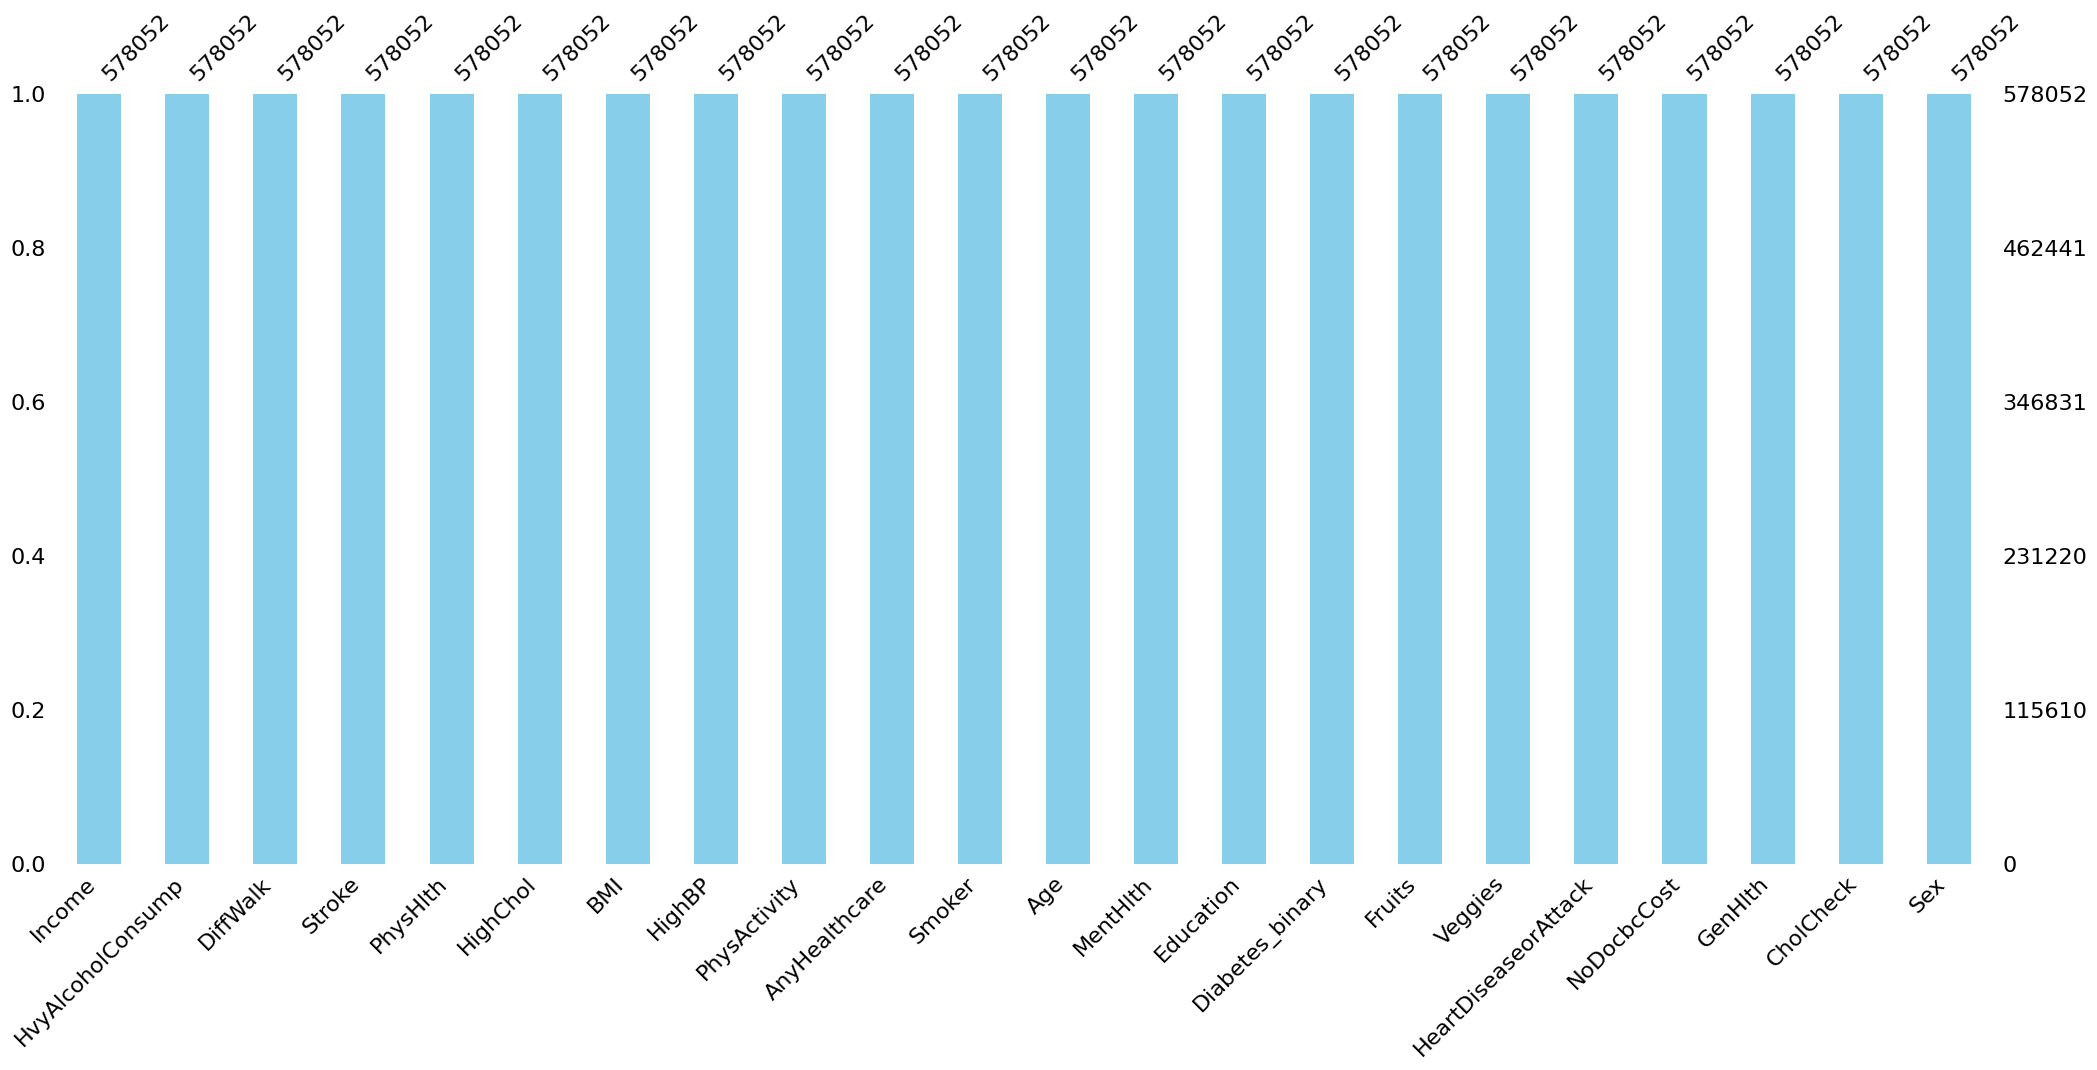

In [6]:
import missingno as msno
msno.bar(df, color='skyblue')
plt.show()


In [7]:
pd.set_option('display.max_rows', None)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,578052.0,6.010392,2.087400,1.0,5.00,7.0,8.0,8.0
HvyAlcoholConsump,578052.0,0.054549,0.227097,0.0,0.00,0.0,0.0,1.0
DiffWalk,578052.0,0.178558,0.382982,0.0,0.00,0.0,0.0,1.0
Stroke,578052.0,0.043212,0.203335,0.0,0.00,0.0,0.0,1.0
PhysHlth,578052.0,4.433878,8.908079,0.0,0.00,0.0,3.0,30.0
HighChol,578052.0,0.436544,0.495957,0.0,0.00,0.0,1.0,1.0
BMI,578052.0,28.562700,6.689993,12.0,24.00,27.0,32.0,98.0
HighBP,578052.0,0.445444,0.497015,0.0,0.00,0.0,1.0,1.0
PhysActivity,578052.0,0.750000,0.433013,0.0,0.75,1.0,1.0,1.0
AnyHealthcare,578052.0,0.951530,0.214757,0.0,1.00,1.0,1.0,1.0


In [8]:
#checking unique values in different variables
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['Valores Unicos nas colunas']).transpose()

,Valores Unicos nas colunas
Income,8
HvyAlcoholConsump,2
DiffWalk,2
Stroke,2
PhysHlth,31
HighChol,2
BMI,84
HighBP,2
PhysActivity,2
AnyHealthcare,2


In [9]:
# Checking duplicates rows in dataset df1 to eliminate them

duplicates = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  308921


,Income,HvyAlcoholConsump,DiffWalk,Stroke,PhysHlth,HighChol,BMI,HighBP,PhysActivity,AnyHealthcare,...,MentHlth,Education,Diabetes_binary,Fruits,Veggies,HeartDiseaseorAttack,NoDocbcCost,GenHlth,CholCheck,Sex
1242,5.0,0.0,1.0,0.0,30.0,1.0,27.0,1.0,0.0,1.0,...,0.0,4.0,2.0,0.0,1.0,0.0,0.0,5.0,1.0,0.0
1563,8.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,1.0,1.0,...,0.0,6.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2700,8.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,1.0,1.0,...,0.0,6.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0
3160,8.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,1.0,1.0,...,0.0,6.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3332,8.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,1.0,1.0,...,0.0,6.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0


In [10]:
df_clean = df.drop_duplicates().copy()
# Dimensões do DataFrame original
rows_orig, col_orig = df.shape
print(f"Número de Linhas (original): {rows_orig} \nNúmero de Colunas: {col_orig}")

# Dimensões após remoção de duplicatas
rows_clean, col_clean = df_clean.shape
print(f"Número de Linhas (sem duplicatas): {rows_clean} \nNúmero de Colunas: {col_clean}")

# Quantidade de linhas removidas
print(f"\nTotal de duplicatas removidas: {rows_orig - rows_clean}")

Número de Linhas (original): 578052 
Número de Colunas: 22
Número de Linhas (sem duplicatas): 269131 
Número de Colunas: 22

Total de duplicatas removidas: 308921


---
# **Visualização dos Dados**



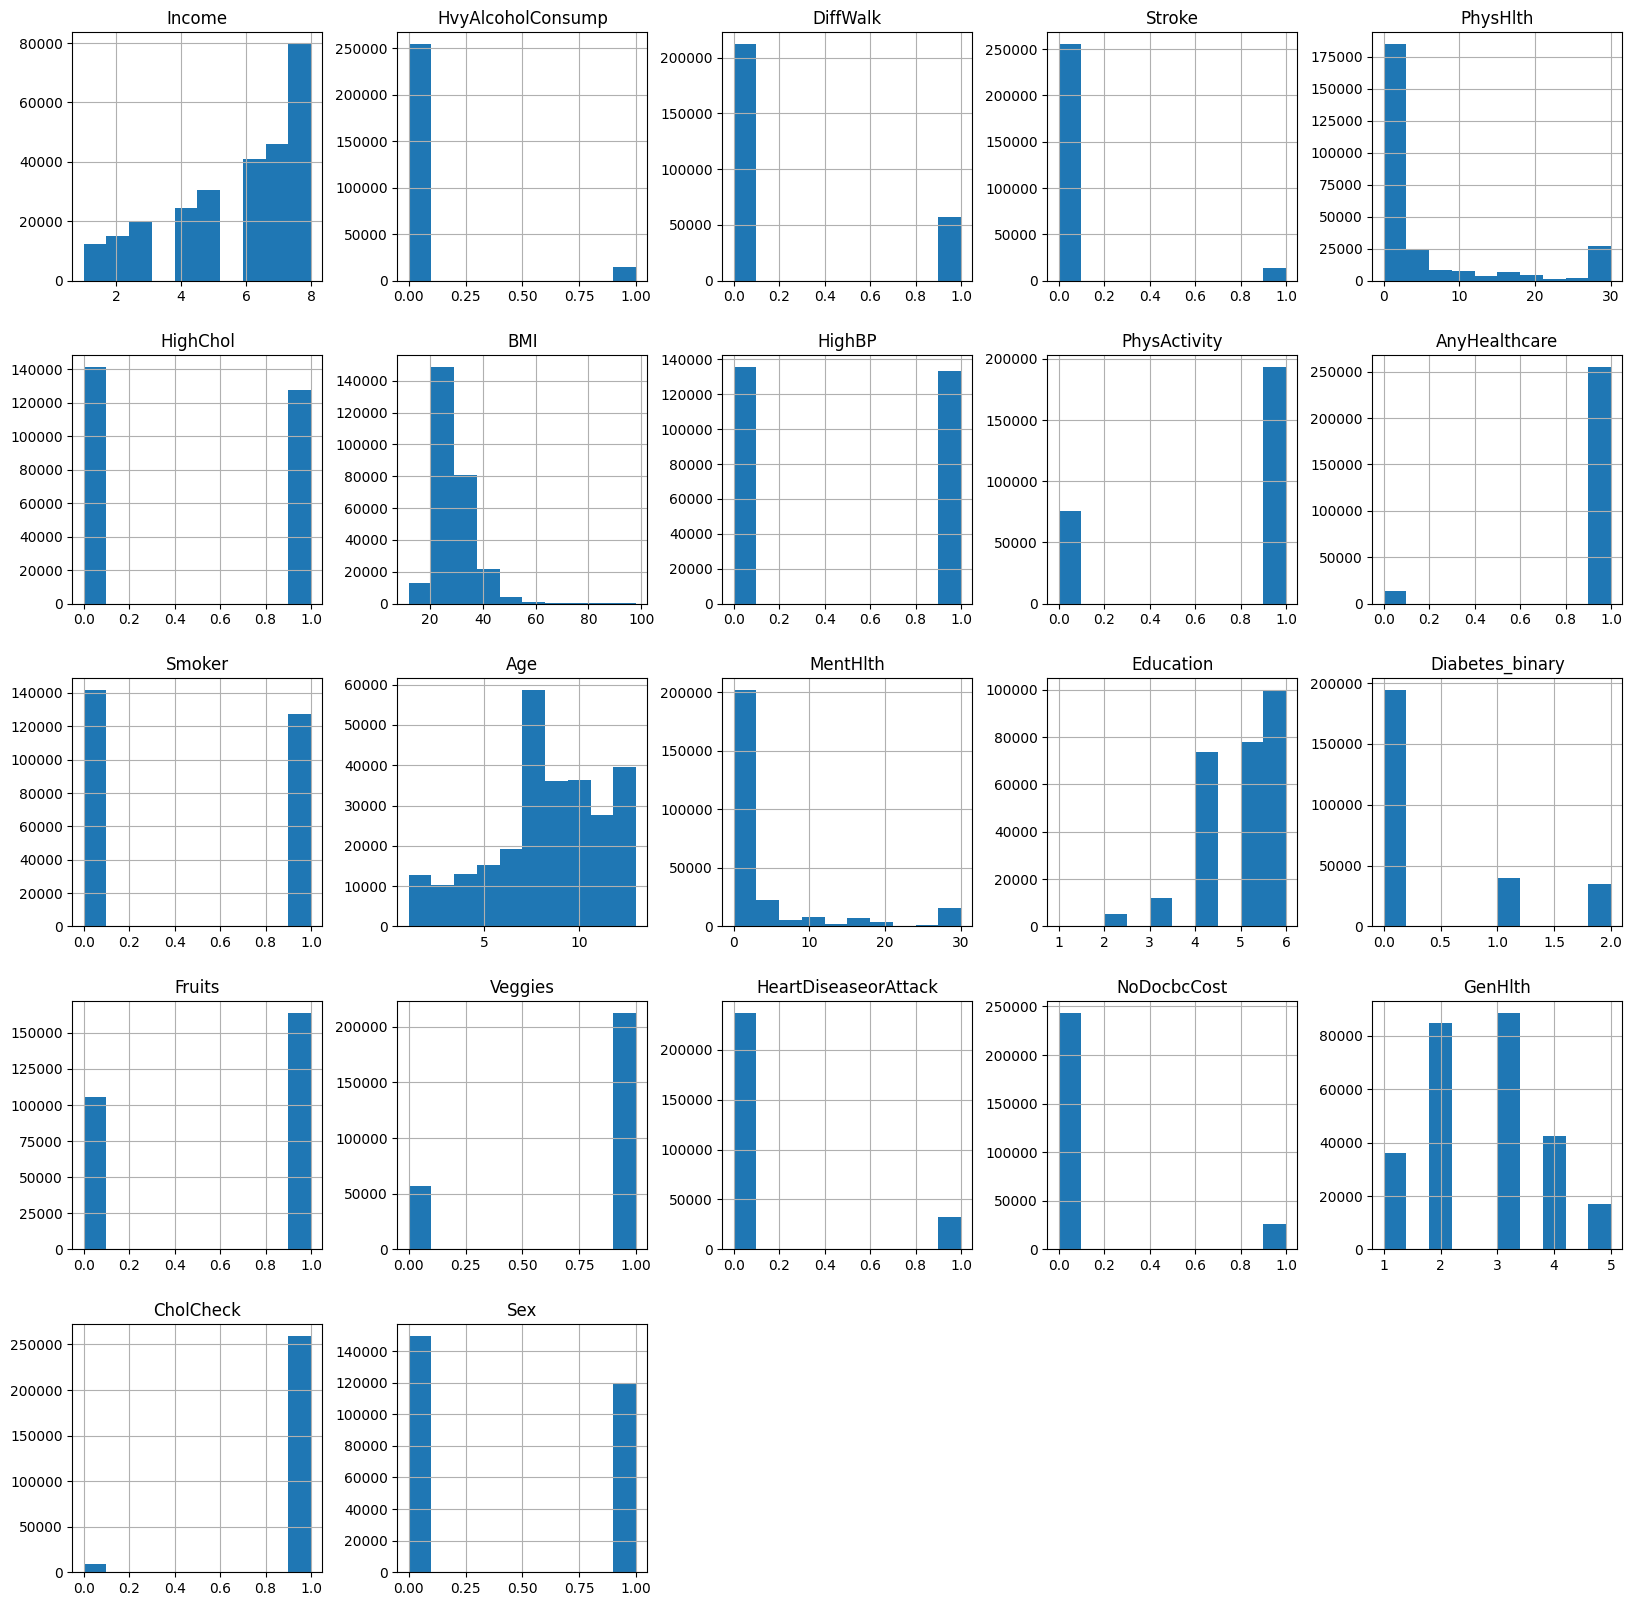

In [11]:
df_clean.hist(figsize = (20,20))
plt.show()

In [14]:
#checking correlation between columns of dataset df1
df_clean.corr(numeric_only=True)


,Income,HvyAlcoholConsump,DiffWalk,Stroke,PhysHlth,HighChol,BMI,HighBP,PhysActivity,AnyHealthcare,...,MentHlth,Education,Diabetes_binary,Fruits,Veggies,HeartDiseaseorAttack,NoDocbcCost,GenHlth,CholCheck,Sex
Income,1.000000,0.074272,-0.311692,-0.122605,-0.251749,-0.075512,-0.084723,-0.151856,0.170293,0.138272,...,-0.193590,0.427634,-0.159230,0.053510,0.129294,-0.130277,-0.188193,-0.343565,-0.002686,0.141090
HvyAlcoholConsump,0.074272,1.000000,-0.051981,-0.024266,-0.040574,-0.024852,-0.062095,-0.023246,0.024713,-0.008708,...,0.014116,0.040893,-0.078049,-0.026758,0.029620,-0.038572,-0.001292,-0.063074,-0.023519,0.011868
DiffWalk,-0.311692,-0.051981,1.000000,0.176708,0.473619,0.147870,0.204864,0.222083,-0.246473,0.018797,...,0.228476,-0.177181,0.222588,-0.033056,-0.066776,0.215208,0.109201,0.458572,0.052369,-0.076393
Stroke,-0.122605,-0.024266,0.176708,1.000000,0.148033,0.092659,0.015295,0.126590,-0.063809,0.012788,...,0.068484,-0.066216,0.105204,-0.005429,-0.036053,0.208361,0.030929,0.176450,0.028130,0.003971
PhysHlth,-0.251749,-0.040574,0.473619,0.148033,1.000000,0.122538,0.122216,0.154221,-0.209467,0.002562,...,0.352486,-0.134398,0.170199,-0.028138,-0.049510,0.180862,0.140674,0.528516,0.042671,-0.045076
HighChol,-0.075512,-0.024852,0.147870,0.092659,0.122538,1.000000,0.102323,0.295372,-0.070862,0.048987,...,0.060799,-0.058798,0.222627,-0.029685,-0.031345,0.179042,0.009945,0.205159,0.096787,0.020396
BMI,-0.084723,-0.062095,0.204864,0.015295,0.122216,0.102323,1.000000,0.209482,-0.139654,-0.007052,...,0.080006,-0.078952,0.228593,-0.069436,-0.045949,0.047661,0.049788,0.226680,0.048222,0.018581
HighBP,-0.151856,-0.023246,0.222083,0.126590,0.154221,0.295372,0.209482,1.000000,-0.111955,0.051405,...,0.044195,-0.118954,0.289148,-0.021939,-0.047292,0.205232,0.006620,0.288017,0.115258,0.044674
PhysActivity,0.170293,0.024713,-0.246473,-0.063809,-0.209467,-0.070862,-0.139654,-0.111955,1.000000,0.022547,...,-0.111749,0.170967,-0.112682,0.123764,0.136662,-0.079860,-0.048132,-0.245343,-0.008042,0.038790
AnyHealthcare,0.138272,-0.008708,0.018797,0.012788,0.002562,0.048987,-0.007052,0.051405,0.022547,1.000000,...,-0.044812,0.106004,0.028758,0.023090,0.020220,0.026492,-0.227193,-0.021636,0.113441,-0.016755


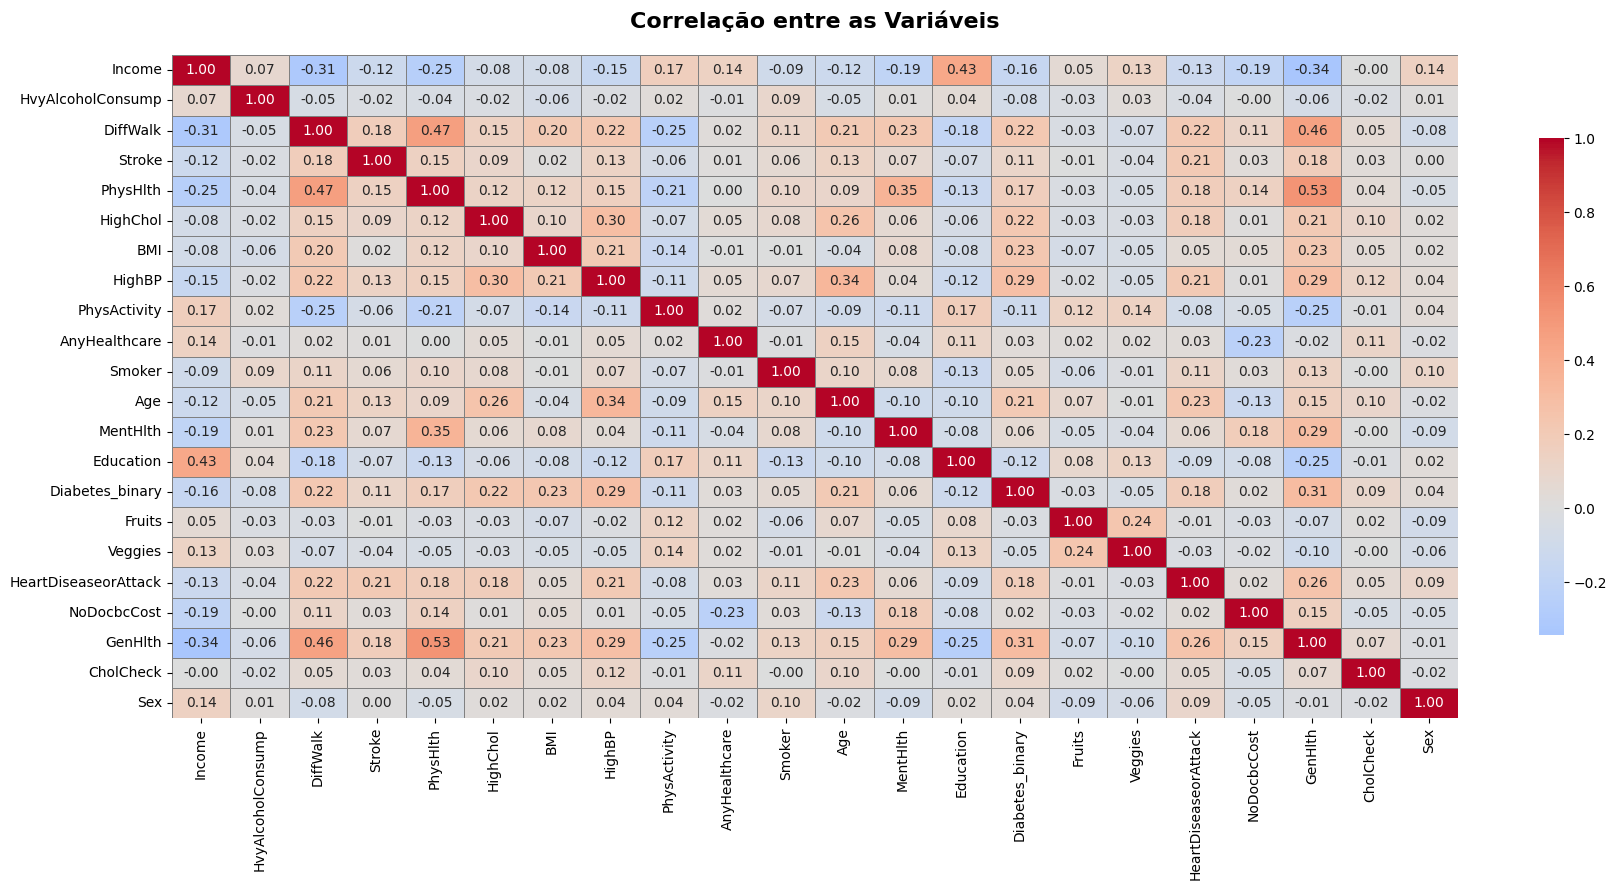

In [15]:
corr = df_clean.corr(numeric_only=True)  # garante apenas colunas numéricas

fig, ax = plt.subplots(figsize=(18, 9))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": 0.75},
    ax=ax
)

ax.set_title("Correlação entre as Variáveis", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


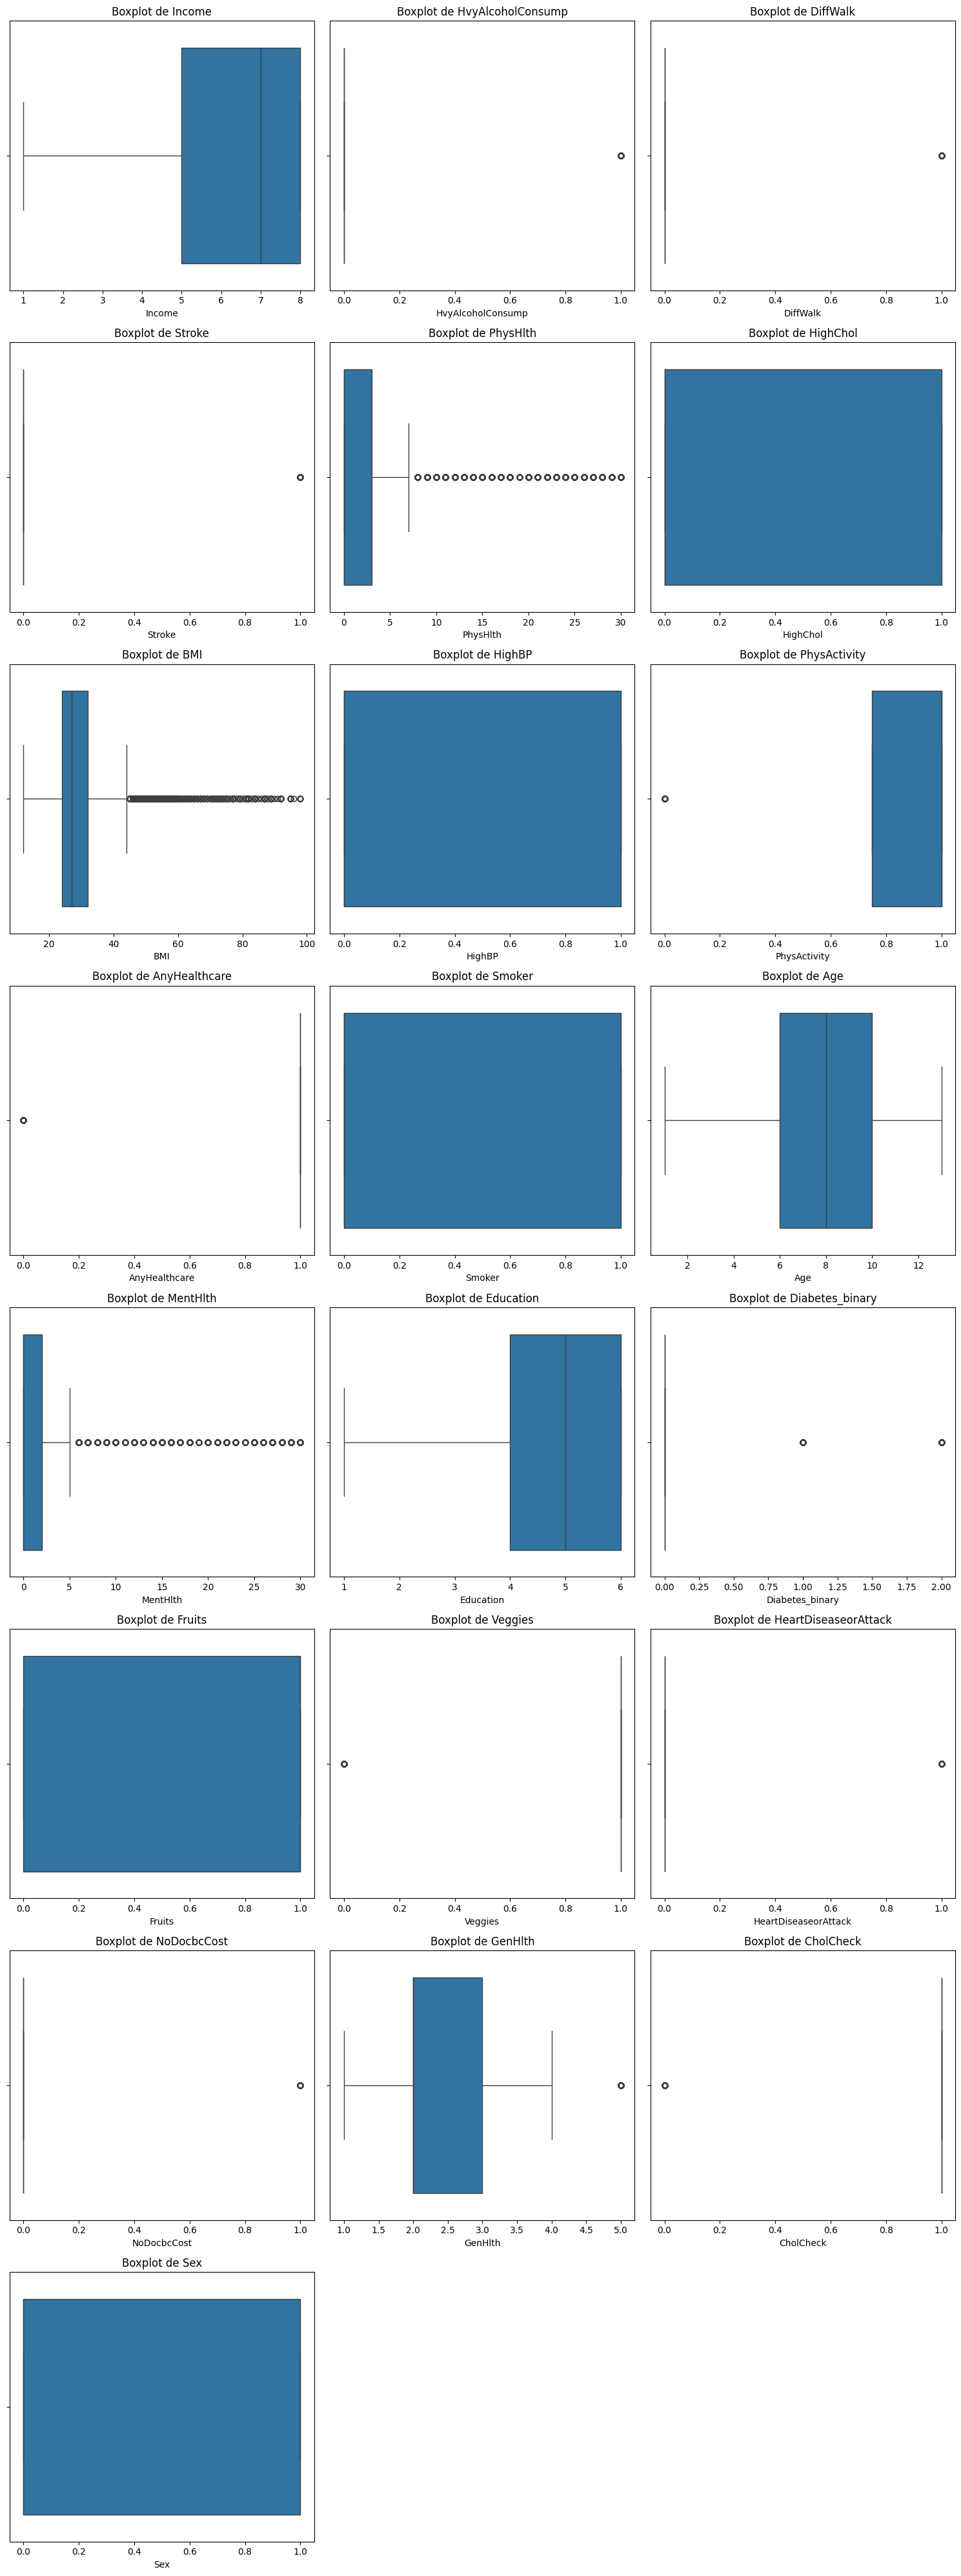

In [16]:
# Selecionar apenas colunas numéricas
numeric_columns = df.select_dtypes(include='number').columns

# Criar subplots
n_cols = 3
n_rows = -(-len(numeric_columns) // n_cols)  # arredondamento para cima
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()  # transforma em vetor para acesso simples

# Criar boxplots
for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot de {column}')

# Remover eixos não usados (caso sobre espaço no grid)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [17]:
df_clean['Diabetes_binary'].unique()

array([0., 2., 1.])

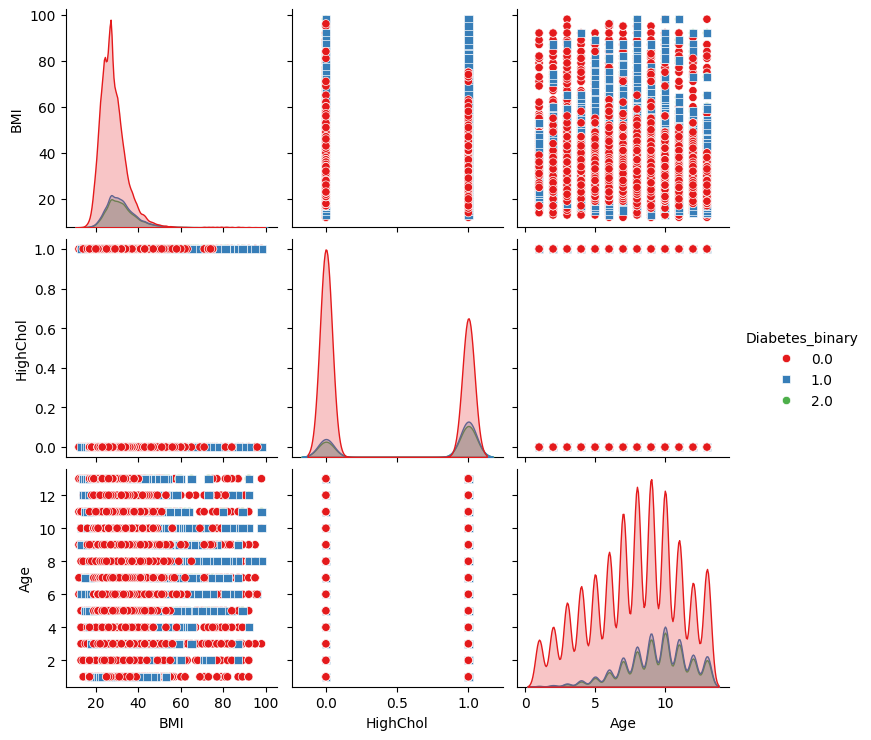

In [18]:
cols = ['BMI', 'HighChol', 'Age', 'Diabetes_binary']
sns.pairplot(data=df_clean[cols], hue='Diabetes_binary', diag_kind='kde', markers=["o", "s"], palette="Set1")
plt.show()


In [ ]:
# Mapeando os valores 0 e 1 para descrições
diabetes_map = {0: "Não Diabético", 1: "Diabético", 2: "Pré-Diabético"}

# Contando os valores e renomeando os índices com base no mapa
tabela_diabetes = df_clean["Diabetes_binary"].value_counts().rename(index=diabetes_map)

# Exibindo a tabela
print(tabela_diabetes)


Diabetes_binary
Não Diabético    194377
Diabético         39657
Pré-Diabético     35097
Name: count, dtype: int64
